2. Build a Multiclass classifier using the CNN model. Use MNIST or any other suitable dataset. a.
Perform Data Pre-processing b. Define Model and perform training c. Evaluate Results using confusion
matrix.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train_cat, epochs=5, batch_size=128, validation_split=0.1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 43s 97ms/step - accuracy: 0.8472 - loss: 0.5155 - val_accuracy: 0.9793 - val_loss: 0.0688
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 96ms/step - accuracy: 0.9805 - loss: 0.0642 - val_accuracy: 0.9870 - val_loss: 0.0477
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 96ms/step - accuracy: 0.9867 - loss: 0.0421 - val_accuracy: 0.9887 - val_loss: 0.0393
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 96ms/step - accuracy: 0.9907 - loss: 0.0320 - val_accuracy: 0.9877 - val_loss: 0.0392
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 95ms/step - accuracy: 0.9928 - loss: 0.0226 - val_accuracy: 0.9878 - val_loss: 0.0415


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9837 - loss: 0.0494
Test Accuracy: 98.69%
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step

Confusion Matrix:
 [[ 975    0    0    0    0    0    3    1    1    0]
 [   0 1133    0    0    0    1    1    0    0    0]
 [   4    3 1007    3    1    1    1    5    7    0]
 [   1    0    0  997    0    5    0    1    4    2]
 [   0    0    0    0  951    0    3    0    1   27]
 [   2    0    0    4    0  882    1    0    0    3]
 [   3    2    0    0    1    6  945    0    1    0]
 [   0    2    1    2    0    0    0 1010    2   11]
 [   3    0    1    0    0    2    0    0  966    2]
 [   0    2    0    0    1    3    0    0    0 1003]]


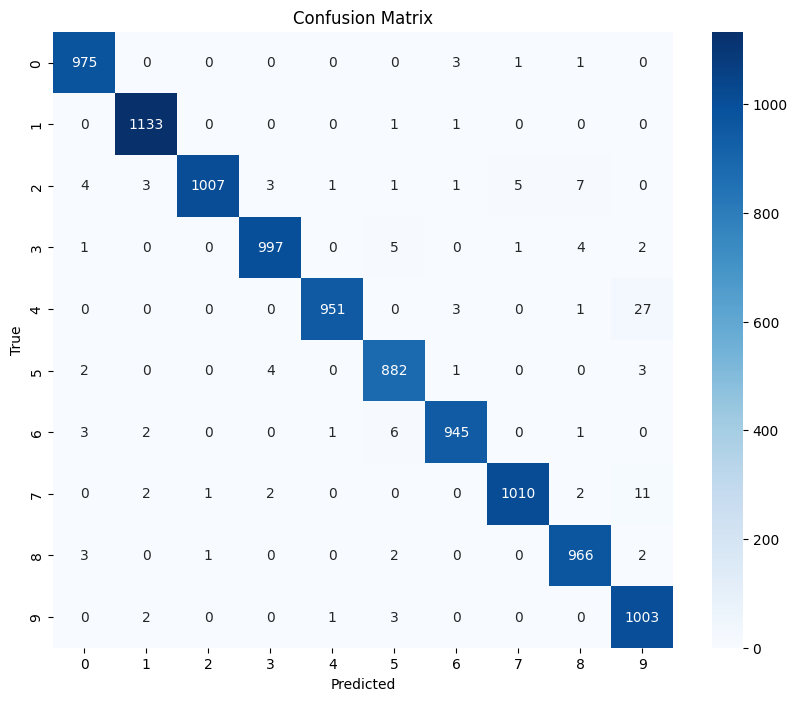

In [5]:
# Evaluate on test data
loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f"Test Accuracy: {accuracy*100:.2f}%")

# Predict classes
y_pred = np.argmax(model.predict(X_test), axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
